<a href="https://colab.research.google.com/github/CarlosFranca1999/summit2025/blob/main/HD_Cleveland.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PASSO 1 e 2: Configuração do Ambiente e Carga dos Dados

Nesta primeira etapa, preparar o ambiente de trabalho. Isso inclui:

* Importar as bibliotecas essenciais para manipulação de dados (pandas),modelagem (scikit-learn) e visualização (matplotlib, seaborn).

* Definir uma semente aleatória (RANDOM_STATE) para garantir que nossos resultados sejam sempre os mesmos ao rodar o código novamente.

* Carregar o dataset Heart_disease_cleveland_new.csv.

* Separar os dados em uma matriz de características (X) e um vetor com a variável alvo (y).

In [ ]:

# PASSO 1: CONFIGURAÇÃO DO AMBIENTE E IMPORTAÇÃO DE BIBLIOTECAS
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, StratifiedShuffleSplit, GridSearchCV, cross_val_predict, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix, accuracy_score

# Configuração inicial para garantir que os resultados sejam reprodutíveis
RANDOM_STATE = 42
sns.set_theme(style="whitegrid")

# ==============================================================================
# PASSO 2: CARREGAMENTO E PREPARAÇÃO DOS DADOS
# ==============================================================================
df_heart = pd.read_csv('/content/Heart_disease_cleveland_new.csv')
print("\nDimensão do dataset (linhas, colunas):", df_heart.shape)
print("\nPrimeiras 5 linhas do dataset:")
print(display(df_heart.head()))

print(f"\nDimensão do dataset: {df_heart.shape}")
X = df_heart.drop("target", axis=1)
y = df_heart["target"]




Dimensão do dataset (linhas, colunas): (303, 14)

Primeiras 5 linhas do dataset:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


None

Dimensão do dataset: (303, 14)


from matplotlib import pyplot as plt
_df_0['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['sex'].plot(kind='hist', bins=20, title='sex')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['cp'].plot(kind='hist', bins=20, title='cp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['trestbps'].plot(kind='hist', bins=20, title='trestbps')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='age', y='sex', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='sex', y='cp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='cp', y='trestbps', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='trestbps', y='chol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['sex'].plot(kind='line', figsize=(8, 4), title='sex')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['cp'].plot(kind='line', figsize=(8, 4), title='cp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['trestbps'].plot(kind='line', figsize=(8, 4), title='trestbps')
plt.gca().spines[['top', 'right']].set_visible(False)

# PASSO 3: Definição das Funções de Visualização

Definir as funções de plotagem. Teremos funções para:

* Gerar gráficos de linha que comparam a performance dos modelos.

* Visualizar como a validação cruzada divide os dados em treino e teste.

* Criar um heatmap para analisar a sensibilidade do modelo aos hiperparâmetros C e gamma.

In [ ]:
# ==============================================================================
# PASSO 3: DEFINIÇÃO DAS FUNÇÕES DE VISUALIZAÇÃO
# ==============================================================================

def gerar_graficos_comparativos(results_df):
    """Gera gráficos de linha comparando a acurácia das estratégias de CV."""
    print("\nGerando gráficos de linha comparativos...")
    linear_results = results_df[results_df['param_svc__kernel'] == 'linear']
    rbf_results = results_df[results_df['param_svc__kernel'] == 'rbf']

    # Gráfico para kernel linear
    plt.figure(figsize=(12, 7))
    sns.lineplot(data=linear_results, x='param_svc__C', y='mean_test_score', hue='cv_strategy', marker='o', linestyle='--')
    plt.xscale('log')
    plt.title("Comparação de Acurácia Média - Kernel Linear", fontsize=16)
    plt.xlabel("Parâmetro C", fontsize=12)
    plt.ylabel("Acurácia Média", fontsize=12)
    plt.legend(title="Estratégia de CV")
    plt.show()

    # Gráfico para kernel RBF
    g = sns.FacetGrid(rbf_results, col="param_svc__gamma", hue="cv_strategy", height=5)
    g.map(sns.lineplot, "param_svc__C", "mean_test_score", marker="o")
    g.set_axis_labels("Parâmetro C", "Acurácia Média")
    g.set_titles("Gamma = {col_name}")
    g.add_legend(title="Estratégia de CV")
    g.set(xscale="log")
    plt.suptitle("Comparação de Acurácia Média - Kernel RBF", y=1.03, fontsize=16)
    plt.show()

def plot_cv_indices(cv, X, y, ax, n_splits, title, lw=10):
    """Função auxiliar para desenhar os gráficos de divisão dos dados."""
    for i, (train, test) in enumerate(cv.split(X=X, y=y)):
        indices = np.array([np.nan] * len(X))
        indices[test] = 1
        indices[train] = 0
        ax.scatter(range(len(indices)), [i + .5] * len(indices), c=indices, marker='_', lw=lw, cmap=plt.cm.viridis, vmin=-.2, vmax=1.2)
    ax.set_yticks(np.arange(n_splits) + .5)
    ax.set_yticklabels([f'Iteração {i+1}' for i in range(n_splits)])
    ax.set_xlabel('Índice da Amostra de Dado')
    ax.set_ylabel(None)
    ax.set_ylim([n_splits, -.5])
    ax.set_xlim([0, len(X)])
    ax.set_title(title, fontsize=14)
    ax.legend([plt.Line2D([0], [0], color=plt.cm.viridis(0.8), lw=lw),
               plt.Line2D([0], [0], color=plt.cm.viridis(0.1), lw=lw)],
              ['Teste', 'Treino'], loc=(1.02, 0.8))

def gerar_heatmap_rbf(results_df, cv_strategy_name):
    """Gera um heatmap dos resultados do Grid Search para o kernel RBF."""
    print(f"\nGerando Heatmap do Grid Search para o Kernel RBF ({cv_strategy_name})...")
    rbf_results = results_df[(results_df['cv_strategy'] == cv_strategy_name) & (results_df['param_svc__kernel'] == 'rbf')]
    pivot = rbf_results.pivot_table(index='param_svc__gamma', columns='param_svc__C', values='mean_test_score')
    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot, annot=True, fmt=".4f", cmap="viridis")
    plt.title(f'Heatmap de Resultados do Grid Search (Kernel RBF com {cv_strategy_name})', fontsize=16)
    plt.xlabel('Parâmetro C', fontsize=12)
    plt.ylabel('Parâmetro Gamma', fontsize=12)
    plt.show()


Funções de visualização definidas com sucesso.


# PASSO 4 e 5: Configuração do Modelo e Execução do Treinamento

Configuração e execução da etapa principal da análise.

* Criar o Pipeline: Define a sequência de transformação com o StandardScaler (padronização) seguido do classificador SVC.

* Definir a Grade de Hiperparâmetros: Lista todos os valores de C, kernel e gamma que o GridSearchCV irá testar.

* Instanciar as Estratégias de Validação Cruzada: Cria os objetos KFold e StratifiedShuffleSplit.

O código treinará e avaliará os modelos para cada estratégia de validação cruzada, com o objetivo de encontrar a melhor combinação de hiperparâmetros.

In [ ]:
# ==============================================================================
# PASSO 4 e 5: CONFIGURAÇÃO DO MODELO E TREINAMENTO
# ==============================================================================
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(random_state=RANDOM_STATE))
])

param_grid = [
    {'svc__kernel': ['linear'], 'svc__C': [0.01, 0.1, 1, 10, 100]},
    {'svc__kernel': ['rbf'], 'svc__C': [0.01, 0.1, 1, 10, 100], 'svc__gamma': ['scale', 0.01, 0.001]}
]

# Estratégias de Validação Cruzada
kfold = KFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.25, random_state=RANDOM_STATE)

# --- Treinamento com GridSearchCV ---
print("\nIniciando GridSearchCV com KFold-10... (Isso pode levar alguns segundos)")
grid_kfold = GridSearchCV(pipe, param_grid, cv=kfold, scoring="accuracy", n_jobs=-1)
grid_kfold.fit(X, y)
print("GridSearchCV com KFold-10 concluído.")

print("\nIniciando GridSearchCV com StratifiedShuffleSplit...")
grid_sss = GridSearchCV(pipe, param_grid, cv=sss, scoring="accuracy", n_jobs=-1)
grid_sss.fit(X, y)
print("GridSearchCV com StratifiedShuffleSplit concluído.")



Iniciando GridSearchCV com KFold-10... (Isso pode levar alguns segundos)
GridSearchCV com KFold-10 concluído.

Iniciando GridSearchCV com StratifiedShuffleSplit...
GridSearchCV com StratifiedShuffleSplit concluído.


# PASSO 6.1 e 6.2: Tabela Resumo e Gráficos Comparativos

Com os modelos treinados, vamos começar a analisar os resultados.

* Tabela Resumo: Criaremos uma tabela pandas para comparar diretamente a acurácia média, o desvio padrão e os parâmetros encontrados para cada estratégia de CV.

* Gráficos de Linha: Chamaremos a função gerar_graficos_comparativos para visualizar como a acurácia varia com os hiperparâmetros para cada estratégia. Isso nos ajuda a entender se uma estratégia é consistentemente melhor que a outra.





      RESUMO COMPARATIVO DOS RESULTADOS

            Estratégia CV  Acurácia Média  Desvio Padrão  \
0                KFold-10        0.841290       0.050953   
1  StratifiedShuffleSplit        0.844737       0.022638   

                                 Melhores Parâmetros  
0  {'svc__C': 10, 'svc__gamma': 0.001, 'svc__kern...  
1  {'svc__C': 0.1, 'svc__gamma': 'scale', 'svc__k...  

Gerando gráficos de linha comparativos...


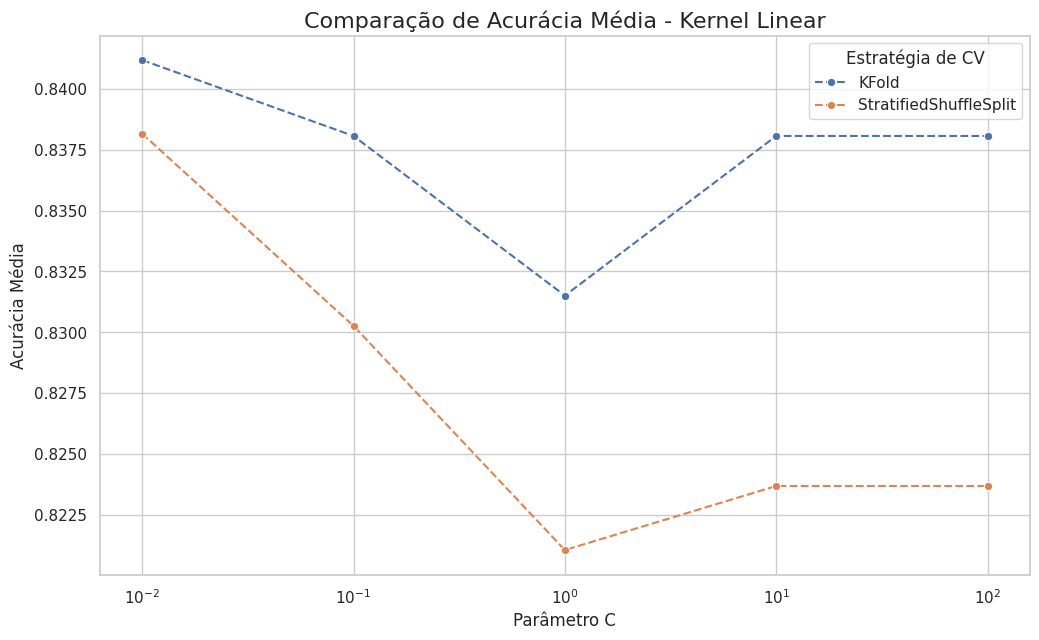

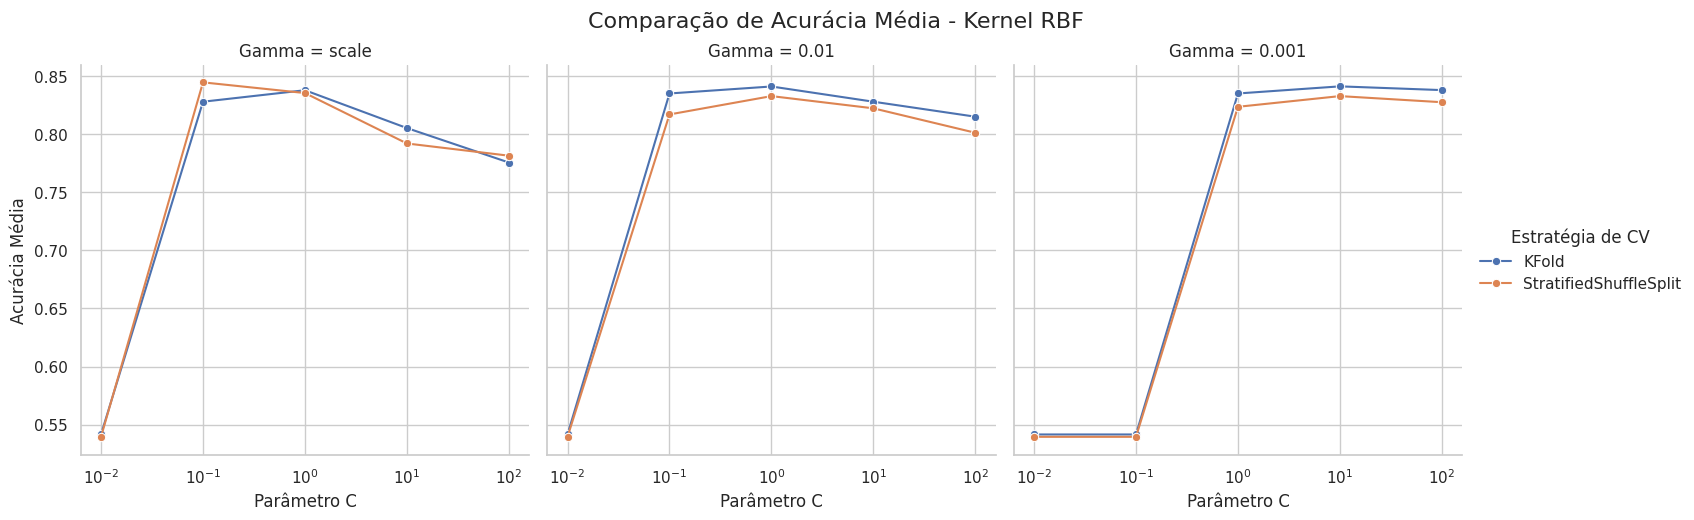

In [ ]:
# ==============================================================================
# PASSO 6.1 e 6.2: TABELA RESUMO E GRÁFICOS COMPARATIVOS
# ==============================================================================

# --- 6.1 Tabela Resumo ---
summary_data = {
    "Estratégia CV": ["KFold-10", "StratifiedShuffleSplit"],
    "Acurácia Média": [grid_kfold.best_score_, grid_sss.best_score_],
    "Desvio Padrão": [
        grid_kfold.cv_results_['std_test_score'][grid_kfold.best_index_],
        grid_sss.cv_results_['std_test_score'][grid_sss.best_index_]
    ],
    "Melhores Parâmetros": [grid_kfold.best_params_, grid_sss.best_params_]
}
df_summary = pd.DataFrame(summary_data)
print("\n\n" + "="*40)
print("      RESUMO COMPARATIVO DOS RESULTADOS")
print("="*40 + "\n")
print(df_summary)

# --- 6.2 Gráficos de Linha Comparativos ---
results_kfold_df = pd.DataFrame(grid_kfold.cv_results_)
results_sss_df = pd.DataFrame(grid_sss.cv_results_)
results_kfold_df['cv_strategy'] = 'KFold'
results_sss_df['cv_strategy'] = 'StratifiedShuffleSplit'
all_results_df = pd.concat([results_kfold_df, results_sss_df], ignore_index=True)

gerar_graficos_comparativos(all_results_df)

# PASSO 6.3: Matrizes de Confusão e Relatórios de Classificação

* Gerar Predições: Usaremos cross_val_predict para obter uma predição para cada amostra do dataset, usando o melhor modelo encontrado para cada estratégia.

* Plotar as Matrizes de Confusão: Visualizaremos os acertos e erros, focando nos Falsos Positivos e Falsos Negativos.

* Exibir o Relatório de Classificação: Veremos métricas detalhadas como precisão, recall e f1-score para cada classe.


Gerando Matrizes de Confusão e Relatórios...


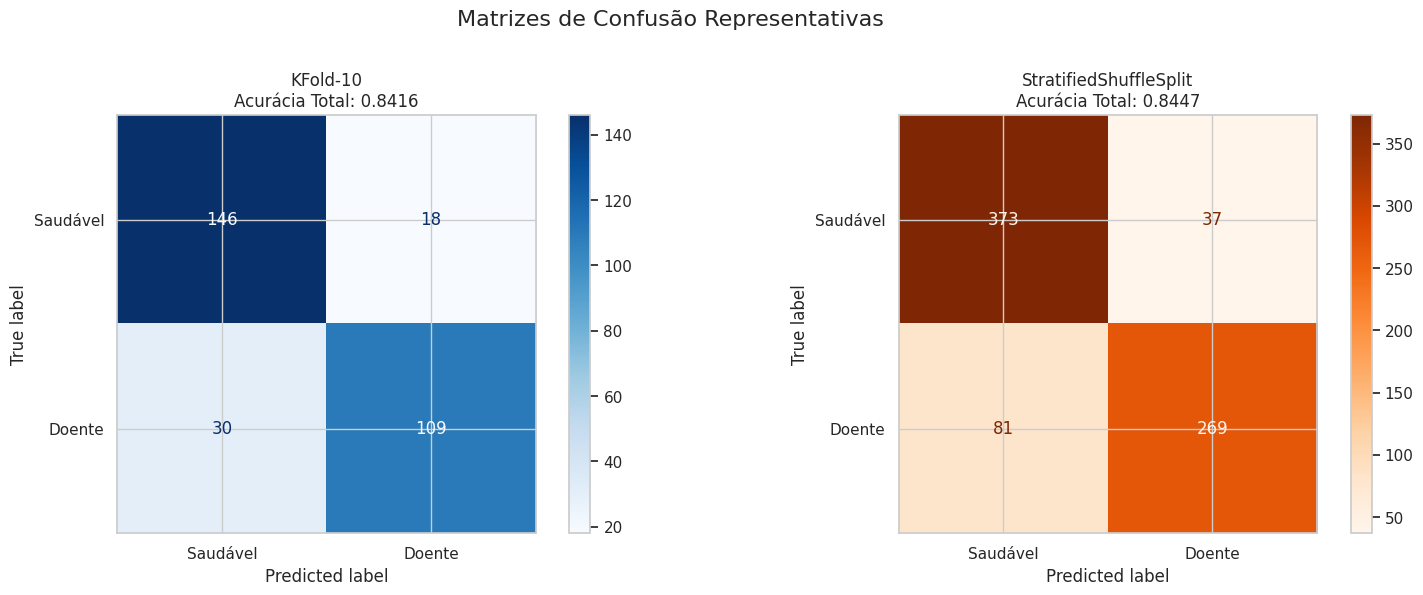


--- RELATÓRIO DE CLASSIFICAÇÃO (KFold-10) ---

              precision    recall  f1-score   support

    Saudável       0.83      0.89      0.86       164
      Doente       0.86      0.78      0.82       139

    accuracy                           0.84       303
   macro avg       0.84      0.84      0.84       303
weighted avg       0.84      0.84      0.84       303


--- RELATÓRIO DE CLASSIFICAÇÃO (StratifiedShuffleSplit) ---

              precision    recall  f1-score   support

    Saudável       0.82      0.91      0.86       410
      Doente       0.88      0.77      0.82       350

    accuracy                           0.84       760
   macro avg       0.85      0.84      0.84       760
weighted avg       0.85      0.84      0.84       760



In [ ]:
# PASSO 6.3: MATRIZES DE CONFUSÃO E RELATÓRIOS
# ==============================================================================
print("\nGerando Matrizes de Confusão e Relatórios...")

# --- Para KFold (funciona diretamente) ---
y_pred_kfold = cross_val_predict(grid_kfold.best_estimator_, X, y, cv=kfold)

# --- Para StratifiedShuffleSplit (requer loop manual) ---
# 1. Obter o melhor modelo encontrado pelo GridSearchCV que usou SSS
best_model_sss = grid_sss.best_estimator_

# 2. Listas para armazenar as predições e os valores verdadeiros de cada iteração
y_true_acumulado_sss = []
y_pred_acumulado_sss = []

# 3. Loop através das divisões criadas pelo SSS
for train_idx, test_idx in sss.split(X, y):
    # Separar os dados da iteração atual
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Treinar o melhor modelo no conjunto de treino da iteração
    best_model_sss.fit(X_train, y_train)

    # Fazer predições no conjunto de teste da iteração
    y_pred_iter = best_model_sss.predict(X_test)

    # Guardar os resultados
    y_true_acumulado_sss.extend(y_test)
    y_pred_acumulado_sss.extend(y_pred_iter)

# --- Plotar as Matrizes ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Matrizes de Confusão Representativas', fontsize=16)

# Matriz para KFold
ConfusionMatrixDisplay.from_predictions(y, y_pred_kfold, ax=axes[0], cmap='Blues', display_labels=['Saudável', 'Doente'])
axes[0].set_title(f'KFold-10\nAcurácia Total: {accuracy_score(y, y_pred_kfold):.4f}')

# Matriz para StratifiedShuffleSplit
ConfusionMatrixDisplay.from_predictions(y_true_acumulado_sss, y_pred_acumulado_sss, ax=axes[1], cmap='Oranges', display_labels=['Saudável', 'Doente'])
axes[1].set_title(f'StratifiedShuffleSplit\nAcurácia Total: {accuracy_score(y_true_acumulado_sss, y_pred_acumulado_sss):.4f}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# --- Relatórios de Classificação ---
print("\n--- RELATÓRIO DE CLASSIFICAÇÃO (KFold-10) ---\n")
print(classification_report(y, y_pred_kfold, target_names=['Saudável', 'Doente']))
print("\n--- RELATÓRIO DE CLASSIFICAÇÃO (StratifiedShuffleSplit) ---\n")
print(classification_report(y_true_acumulado_sss, y_pred_acumulado_sss, target_names=['Saudável', 'Doente']))


# Etapa 6.4: Análise Visual das Estratégias de Validação Cruzada
Uma análise visual é a forma mais intuitiva de compreender a diferença mecânica entre KFold e StratifiedShuffleSplit. O gráfico a seguir ilustra como cada estratégia particiona o conjunto de dados em subconjuntos de treino e teste ao longo de suas 10 iterações.

* KFold (Gráfico Superior): Observe como os blocos de teste (roxo) são distintos e não sobrepostos. Ao final das 10 iterações, cada amostra do dataset foi utilizada para teste exatamente uma vez. Isso representa uma partição completa e sequencial dos dados.

* StratifiedShuffleSplit (Gráfico Inferior): Note que os blocos de teste são selecionados aleatoriamente em cada iteração e possuem um tamanho fixo (25% do total). Isso significa que uma mesma amostra pode aparecer no conjunto de teste múltiplas vezes ou nenhuma vez. Sua principal vantagem é preservar a proporção das classes em cada divisão.

Essa diferença fundamental no particionamento pode influenciar a variância e o viés da estimativa de performance do modelo.


Gerando visualizações do processo de Cross-Validation...


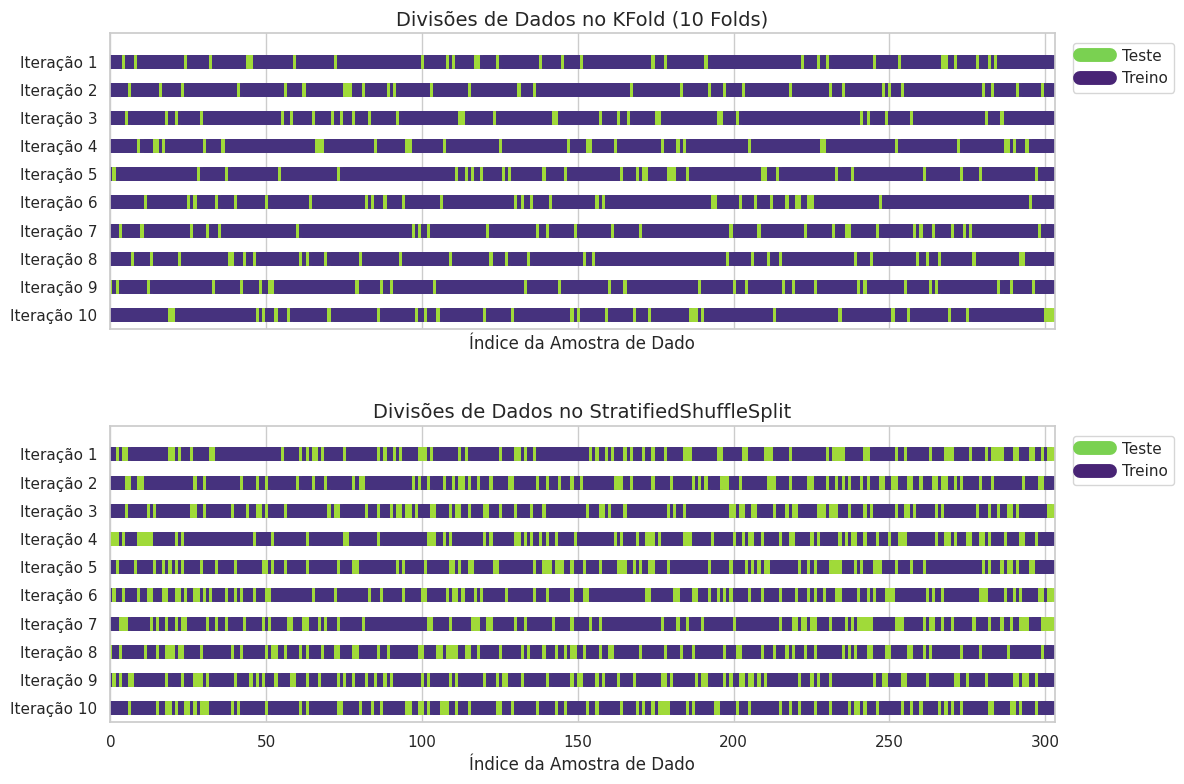

In [ ]:
print("\nGerando visualizações do processo de Cross-Validation...")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

plot_cv_indices(kfold, X, y, ax1, 10, 'Divisões de Dados no KFold (10 Folds)')
plot_cv_indices(sss, X, y, ax2, 10, 'Divisões de Dados no StratifiedShuffleSplit')

fig.tight_layout(h_pad=3.0)
plt.show()

# Etapa 6.5: Análise da Sensibilidade aos Hiperparâmetros com Heatmap

Para o kernel RBF, o desempenho do SVM é sensível à interação entre os hiperparâmetros C (regularização) e gamma. O heatmap nos permite visualizar a "superfície de performance" do modelo, facilitando a identificação da combinação ideal.

A interpretação do gráfico é a seguinte:

* Eixos X e Y: Representam os valores de C e gamma testados.

* Intensidade da Cor: Indica a acurácia média obtida pelo modelo. Cores mais claras (ou "quentes") representam maior acurácia.

O objetivo é encontrar a região ótima no mapa, ou seja, a área com a cor mais intensa, que corresponde à melhor sinergia entre os dois hiperparâmetros.


Gerando Heatmap do Grid Search para o Kernel RBF...


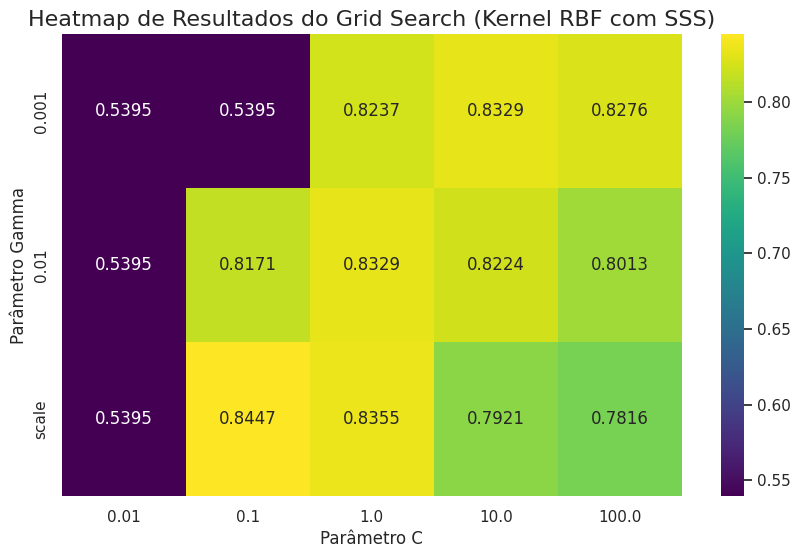

In [ ]:
# --- Geração do Heatmap para o Kernel RBF (usando resultados do StratifiedShuffleSplit) ---
print("\nGerando Heatmap do Grid Search para o Kernel RBF...")

# Converte resultados do GridSearchCV em DataFrame
rbf_results = pd.DataFrame(grid_sss.cv_results_)

rbf_results['cv_strategy'] = "StratifiedShuffleSplit"

# Filtra apenas os resultados do SSS para o RBF
rbf_results_sss = rbf_results[rbf_results['cv_strategy'] == 'StratifiedShuffleSplit']

# Cria a tabela pivot para o heatmap
pivot = rbf_results_sss.pivot_table(
        index='param_svc__gamma',
        columns='param_svc__C',
        values='mean_test_score'
    )

    # Plota o heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".4f", cmap="viridis")
plt.title('Heatmap de Resultados do Grid Search (Kernel RBF com SSS)', fontsize=16)
plt.xlabel('Parâmetro C', fontsize=12)
plt.ylabel('Parâmetro Gamma', fontsize=12)
plt.show()


# Etapa 6.6: Visualização da Separação de Classes com PCA
Dado que o dataset possui múltiplas dimensões (features), não é possível visualizar diretamente como o modelo separa os pacientes. Para contornar isso, usamos a Análise de Componentes Principais (PCA), uma técnica de redução de dimensionalidade.

O processo consiste em:

* Reduzir as 13 features do conjunto de teste para apenas 2 Componentes Principais, que são novas variáveis que capturam a maior parte da variância dos dados originais.

* Plotar cada paciente em um gráfico de dispersão usando esses dois componentes como eixos.

* Colorir cada ponto de acordo com a classe predita pelo nosso melhor modelo SVM.

O objetivo é inspecionar visualmente a fronteira de decisão implícita do modelo. Um bom resultado mostraria uma separação clara entre os clusters de pontos de cores diferentes, indicando que o modelo aprendeu a distinguir bem entre as duas classes.


Gerando Visualização PCA das Predições...


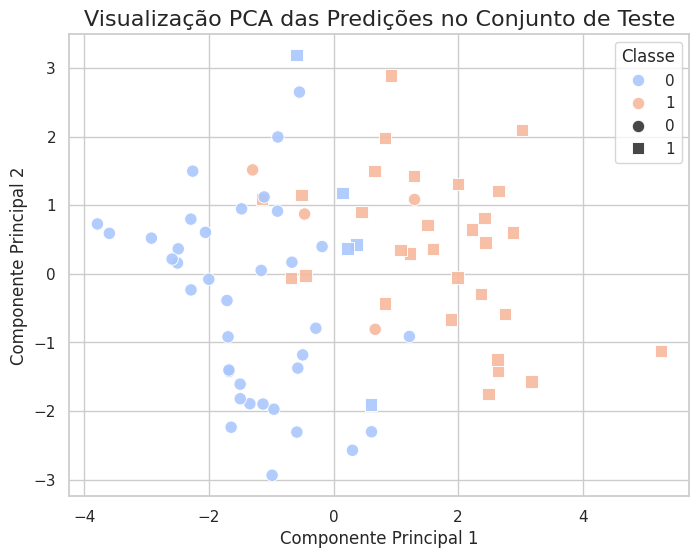

In [ ]:
print("\nGerando Visualização PCA das Predições...")

# 1. Seleciona o melhor modelo geral (usaremos o do StratifiedShuffleSplit como exemplo)
best_overall_model = grid_sss.best_estimator_

# 2. Cria um único split de treino/teste para ter um conjunto de dados para visualizar
#    Isso garante que temos X_test e y_test definidos nesta célula.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE, stratify=y)

# 3. Treina o pipeline completo (scaler + SVC) no conjunto de treino
best_overall_model.fit(X_train, y_train)

# 4. Faz as predições no conjunto de teste. O pipeline lida com o scaling internamente.
y_pred_test = best_overall_model.predict(X_test)

# 5. Para a visualização, precisamos aplicar o PCA nos dados DEPOIS de escalados.
#    Extraímos o scaler já treinado de dentro do nosso pipeline.
scaler_from_pipeline = best_overall_model.named_steps['scaler']
X_test_scaled = scaler_from_pipeline.transform(X_test)

# 6. Aplica o PCA nos dados de teste já escalados
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled)

# 7. Plota o resultado
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test_pca[:, 0], y=X_test_pca[:, 1], hue=y_pred_test, palette='coolwarm', alpha=0.9, s=80, style=y_test, markers=['o', 's'])
plt.title("Visualização PCA das Predições no Conjunto de Teste", fontsize=16)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Classe")
plt.show()